In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import requests
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
n_samples = 1000

X, y= make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [5]:
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [7]:
circles.X1

0      0.754246
1     -0.756159
2     -0.815392
3     -0.393731
4      0.442208
         ...   
995    0.244054
996   -0.978655
997   -0.136900
998    0.670362
999    0.281057
Name: X1, Length: 1000, dtype: float64

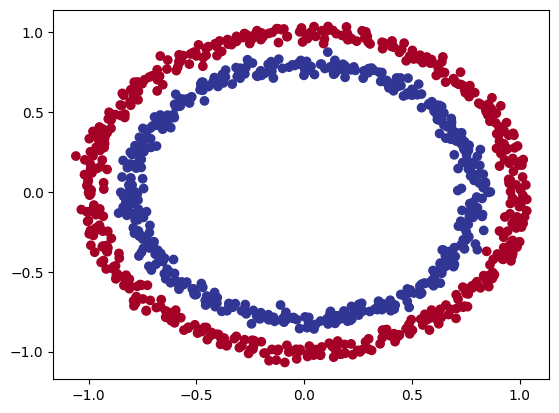

In [8]:
plt.scatter(circles.X1, circles.X2, c=circles.label, cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# let's see the data from first row

print(f"Value for one sample of X: {X[0]} and same for y: {y[0]}")
print(f"Shape for one sameple of X: {X[0].shape} and same for the y: {y[0].shape}")

Value for one sample of X: [0.75424625 0.23148074] and same for y: 1
Shape for one sameple of X: (2,) and same for the y: ()


In [11]:
X.dtype, X.device, X[:10]

(dtype('float64'),
 'cpu',
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]))

In [12]:
# let's convert the numpy arrays to pytorch tensors

X = torch.from_numpy(X).type(torch.float32).to(device)
y = torch.from_numpy(y).type(torch.float32).to(device)


X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [14]:
# class CircleModeV0(nn.Module):

#     def __init__(self):
#         super().__init__()

#         self.layer_1 = nn.Linear(in_features=2, out_features=5)
#         self.layer_2 = nn.Linear(in_features=5, out_features=1)

#         def forward(self, x:torch.tensor) -> torch.tensor:

#             return self.layer_2(self.layer_1(x))
        
# model_0 = CircleModeV0()
# model_0, model_0.state_dict()

### Let's build this model using nn.sequential

In [15]:
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
untrained_preds = model_0(X_test)
untrained_preds[:10], y_test[:10]

(tensor([[0.4119],
         [0.2202],
         [0.8393],
         [0.2911],
         [0.7199],
         [0.6038],
         [0.1585],
         [0.2481],
         [0.8437],
         [0.2060]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [17]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### let's create the evaluation metric

In [18]:
def accuracy_fn(y_true, y_pred):

    correct = torch.eq(y_true, y_pred).sum().item()
    acc =  (correct / len(y_pred)) * 100
    return acc

## Let's test it out

In [19]:
y_logits = model_0(X_test)[:5]
y_logits

tensor([[0.4119],
        [0.2202],
        [0.8393],
        [0.2911],
        [0.7199]], device='cuda:0', grad_fn=<SliceBackward0>)

In [20]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs.round().squeeze()

tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

## Model

In [21]:
def fit_fn(epochs):

    torch.manual_seed(42)

    for epoch in range(epochs):

        model_0.train()

        train_logits = model_0(X_train).squeeze()

        train_pred = torch.round(torch.sigmoid(train_logits))

        train_loss = loss_fn(train_logits, y_train)

        train_accuracy = accuracy_fn(y_true=y_train,
                        y_pred=train_pred)

        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()

        ## testing

        model_0.eval()

        with torch.inference_mode():

            # Forward pass

            test_logits = model_0(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # calculate loss and accuracy

            test_loss = loss_fn(test_logits, y_test)
            test_accuracy = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
            
            if epoch % 10 == 0:

                print(f"Epoch: {epoch} ----- | Train Loss: {train_loss: .5f} ----- | Train Accuracy: {train_accuracy: .2f}% ----- | Test Loss: {test_loss: .5f} ----- | Test Accuracy: {test_accuracy: .2f}%")

In [22]:
fit_fn(100)

Epoch: 0 ----- | Train Loss:  0.74332 ----- | Train Accuracy:  50.00% ----- | Test Loss:  0.72421 ----- | Test Accuracy:  50.00%
Epoch: 10 ----- | Train Loss:  0.71555 ----- | Train Accuracy:  50.12% ----- | Test Loss:  0.70314 ----- | Test Accuracy:  50.00%
Epoch: 20 ----- | Train Loss:  0.70418 ----- | Train Accuracy:  58.75% ----- | Test Loss:  0.69520 ----- | Test Accuracy:  56.00%
Epoch: 30 ----- | Train Loss:  0.69921 ----- | Train Accuracy:  53.12% ----- | Test Loss:  0.69221 ----- | Test Accuracy:  53.50%
Epoch: 40 ----- | Train Loss:  0.69691 ----- | Train Accuracy:  51.50% ----- | Test Loss:  0.69117 ----- | Test Accuracy:  53.50%
Epoch: 50 ----- | Train Loss:  0.69576 ----- | Train Accuracy:  50.25% ----- | Test Loss:  0.69090 ----- | Test Accuracy:  54.00%
Epoch: 60 ----- | Train Loss:  0.69512 ----- | Train Accuracy:  49.75% ----- | Test Loss:  0.69091 ----- | Test Accuracy:  53.00%
Epoch: 70 ----- | Train Loss:  0.69474 ----- | Train Accuracy:  49.25% ----- | Test Loss:  

### 4. Make predictions and evaluate the model

In [23]:
if Path("utilities/helper_functions.py").is_file():

    print(f"helper_functions.py already exists, skipping download")

else:

    print(f"Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    
    FOLDER_NAME = Path("utilities")
    FOLDER_NAME.mkdir(parents=True, exist_ok=True)

    with open('utilities/helper_functions.py', 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [24]:
from utilities.helper_functions import plot_decision_boundary, plot_predictions

### Plot decision boundaries for training and testing sets

In [52]:
def plot_train_test(model):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, X_train, y_train)

    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, X_test, y_test)

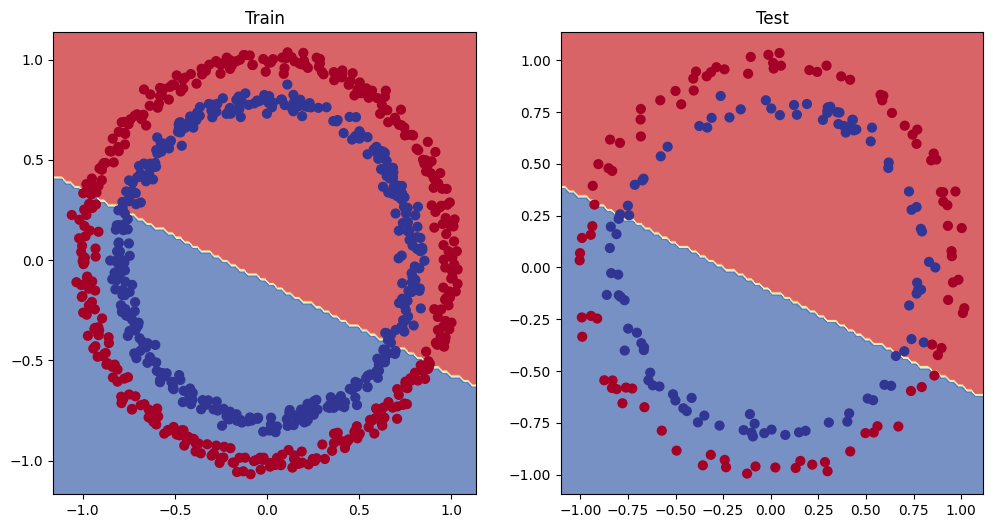

In [53]:
plot_train_test(model_0)

### 5. Improving a model (from a model perspective)

In [30]:
class CircleModelV1(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x:torch.tensor) -> torch.tensor:

        return self.layer_3(self.layer_2(self.layer_1(x)))
    

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

#### let's create the same method using sequential method

In [29]:
model_1 = nn.Sequential(
    
    
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
## using the first method
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

#### Putting model on cuda

In [42]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
def fit_fn(epochs):

    for epoch in range(epochs):

        model_1.train()

        train_logits = model_1(X_train).squeeze()
        train_preds = torch.round(torch.sigmoid(train_logits))

        train_loss = loss_fn(train_logits, y_train)
        train_accuracy = accuracy_fn(y_train,
                                     train_preds)
        
        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()

        model_1.eval()

        with torch.inference_mode():

            test_logits = model_1(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))

            test_loss = loss_fn(test_logits, y_test)
            test_accuracy = accuracy_fn(y_test,
                                        test_preds)
            
            if epoch % 20 == 0:

                print(f"Epoch: {epoch} ---- | Train Loss: {train_loss: .5f} ---- | Train Accuracy: {train_accuracy: .2f}% ---- | Test Loss: {test_loss: .5f} ---- | Test Accuracy: {test_accuracy: .2f}%")

In [51]:
fit_fn(1000)

Epoch: 0 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  51.00% ---- | Test Loss:  0.69548 ---- | Test Accuracy:  47.00%
Epoch: 20 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  51.00% ---- | Test Loss:  0.69546 ---- | Test Accuracy:  47.00%
Epoch: 40 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  51.00% ---- | Test Loss:  0.69544 ---- | Test Accuracy:  47.00%
Epoch: 60 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  51.00% ---- | Test Loss:  0.69542 ---- | Test Accuracy:  47.00%
Epoch: 80 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  50.88% ---- | Test Loss:  0.69540 ---- | Test Accuracy:  47.00%
Epoch: 100 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  50.88% ---- | Test Loss:  0.69538 ---- | Test Accuracy:  47.00%
Epoch: 120 ---- | Train Loss:  0.69301 ---- | Train Accuracy:  50.88% ---- | Test Loss:  0.69536 ---- | Test Accuracy:  47.00%
Epoch: 140 ---- | Train Loss:  0.69300 ---- | Train Accuracy:  50.88% ---- | Test Loss:  0.69534 ---- | Test Accuracy

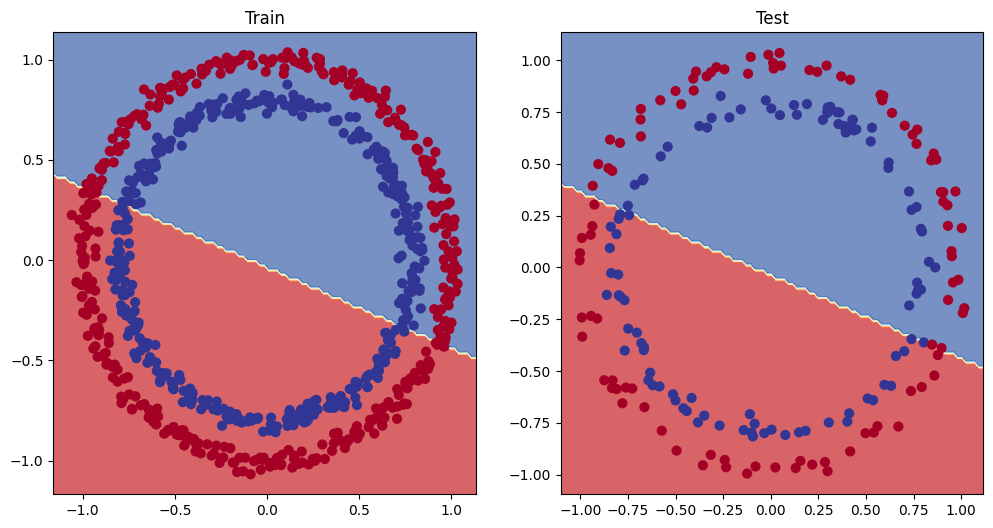

In [54]:
plot_train_test(model_1)

## Linearity

The problem with our previous model is that it was using linear activation function which will only produce straight lines and as we have data of circle with linearity we can get the accuracy and can lower the loss

## Non-Linearity

So, to solve this issue we are gonna use the relu function which can prodcue the non-linear lines that can easily be fit with out data

> nn.Relu

## Logits issue

Previously, we was getting logits from our model and we gotta use the sigmoid in it, inside the training loop, testing loop, evaluation and even on inference, to solve this issue we will use sigmoid on the outer layer inside the model architecture as we are gonna use relu and with sigmoid inside we will use **BCE without logits**

> nn.Sigmoid

### Let's create model with non-linear activation function

In [112]:
class CircleModelV2(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()
        

    def forward(self, x: torch.tensor) -> torch.tensor:

        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2()
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [113]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

## put model on cuda

In [114]:
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [115]:
X_train.device, X_test.device, y_train.device, y_test.device, next(model_2.parameters()).device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

## let's run multiple tests before training

In [116]:
torch.round(model_2(X_train)[:5].squeeze())

tensor([0., 0., -0., -0., -0.], device='cuda:0', grad_fn=<RoundBackward0>)

## Training model with Non-Linearity

In [117]:
def fit_fn(epochs):

    for epoch in range(epochs):

        model_2.train()

        # train_preds = torch.round(model_2(X_train).squeeze())
        # train_loss = loss_fn(train_preds, y_train)
        # train_accuracy = accuracy_fn(y_train,
        #                             train_preds)
        
        train_logits = model_2(X_train).squeeze()
        train_preds = torch.round(torch.sigmoid(train_logits))
        
        train_loss = loss_fn(train_logits, y_train)
        train_accuracy = accuracy_fn(y_train,
                                    train_preds)

        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()

        ## testing


        model_2.eval()

        with torch.inference_mode():

            # test_preds = torch.round(model_2(X_test).squeeze())
            # test_loss = loss_fn(test_preds, y_test)
            # test_accuracy = accuracy_fn(y_test,
            #                             test_preds)

            test_logits = model_2(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits, y_test)
            test_accuracy = accuracy_fn(y_test,
                                        test_preds)


            if epoch % 20 == 0:

                print(f"Epoch: {epoch} --- | Train Loss: {train_loss: .5f} --- | Train Accuracy : {train_accuracy: .2f}% --- | Test Loss: {test_loss: .5f} --- |Test Accuracy: {test_accuracy: .2f}%")

In [121]:
fit_fn(2000)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

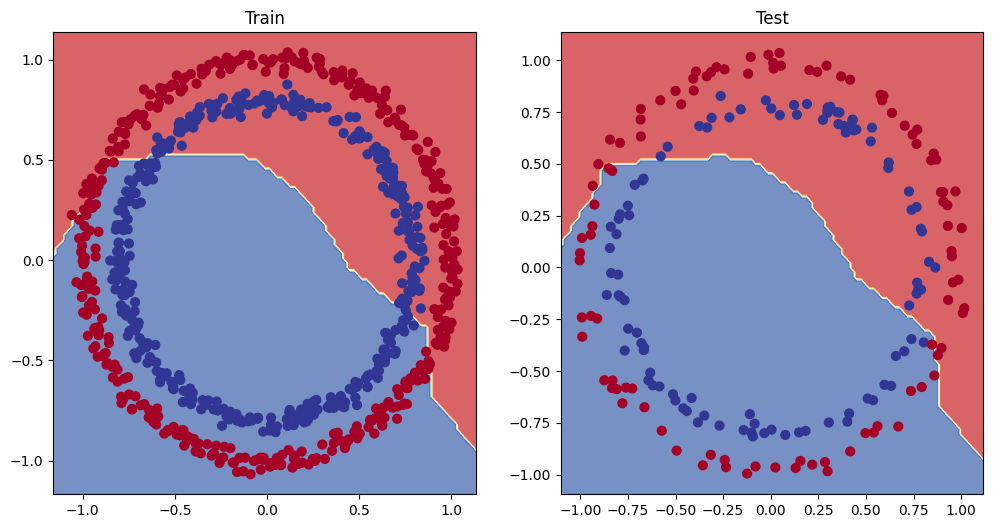

In [120]:
plot_train_test(model_2)